# Lets predict Lung Cancer using Ensemble Classifer

Import Section 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import operator
import copy
import json
import pickle
import seaborn as sns

Lets work on the cancer dataset

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir lungcancer
!kaggle datasets download -d mysarahmadbhat/lung-cancer
!unzip lung-cancer.zip -d lungcancer

  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 1.76MB/s]
Archive:  lung-cancer.zip
  inflating: lungcancer/survey lung cancer.csv  


Lets Load the dataset

In [ ]:
cancerdata = pd.read_csv('/content/lungcancer/survey lung cancer.csv')
cancerdata.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
cancerdata.GENDER = cancerdata.GENDER.map({'M':0,'F':1})
cancerdata.LUNG_CANCER = cancerdata.LUNG_CANCER.map({'NO':0,'YES':1})
for column in cancerdata.columns[2:-1]:
  cancerdata[column] = cancerdata[column].apply(lambda X: X-1)
cancerdata

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [ ]:
X = cancerdata.drop(['LUNG_CANCER'], axis = 1)
y = cancerdata['LUNG_CANCER']

In [ ]:
y.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42, n_jobs = -1)
X, y = smt.fit_resample(X, y)

In [ ]:
print(X.shape)
print(y.shape)

(532, 15)
(532,)


In [ ]:
print('nulls in X  : \n\n' ,X.isnull().sum(),'\n')
print('nulls in y  : \n\n' ,y.isnull().sum())

nulls in X  : 

 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64 

nulls in y  : 

 0


# Now lets import different classifiers from Sklearn and grid search for hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(425, 15)
(107, 15)
(425,)
(107,)


In [ ]:
X_train.AGE.shape

(425,)

In [ ]:
scalar = StandardScaler()
X_train.AGE = scalar.fit_transform(np.array(X_train.AGE).reshape(-1,1))
X_test.AGE = scalar.transform(np.array(X_test.AGE).reshape(-1,1))


## Now lets start with KNN Classifer

In [ ]:
knn_clf = KNeighborsClassifier()
param_grids = {'base_estimator__n_neighbors' : [1, 2, 3, 4, 5],'max_features' : [0.3,0.4,0.5,0.6,0.7],'n_estimators':[25,28,30,32,35],'max_samples' : [0.4,0.5,0.6,0.7,0.8]}
knn_classif = GridSearchCV(estimator = BaggingClassifier(knn_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy', n_jobs = -1)
knn_classif.fit(X_train,y_train)
knn_classif.best_estimator_

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4),
                  max_features=0.5, max_samples=0.8, n_estimators=28)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4),
                  max_features=0.5, max_samples=0.8, n_estimators=28)

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 4)
knn_classif =BaggingClassifier(knn_clf,max_features=0.5,max_samples=0.8, n_estimators=28,n_jobs =-1)
knn_classif.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4),
                  max_features=0.5, max_samples=0.8, n_estimators=28,
                  n_jobs=-1)

accuracy score : 0.9719626168224299
f1 score : 0.970873786407767
auc score : 0.9968553459119497
log loss : 0.14120326443861522
classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.94      0.97        53

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107

*********** confusion matrx ***********


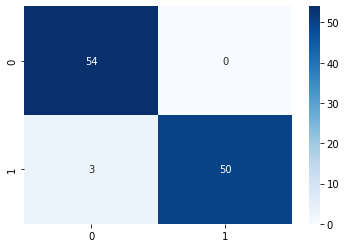

In [ ]:
y_pred = knn_classif.predict(X_test)
y_prob = knn_classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')

# Now lets use gaussian Naive Bayes

In [ ]:
naive_clf = GaussianNB()
param_grids = {'base_estimator__var_smoothing' : np.logspace(0,-9, num=10),'max_features' : [0.3,0.4,0.5,0.6,0.7],'n_estimators':[25,28,30,32,35],'max_samples' : [0.4,0.5,0.6,0.7,0.8]}
naive_classif = GridSearchCV(estimator = BaggingClassifier(naive_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy',verbose = 2)
naive_classif.fit(X_train,y_train)
naive_classif.best_estimator_

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=1e-07),
                  max_features=0.3, max_samples=0.8, n_estimators=28)

In [ ]:
naive_clf = GaussianNB(var_smoothing=1e-07)
naive_classif =BaggingClassifier(naive_clf,max_features=0.3,max_samples=0.8, n_estimators=28,n_jobs =-1)
naive_classif.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=1e-07),
                  max_features=0.3, max_samples=0.8, n_estimators=28,
                  n_jobs=-1)

accuracy score : 0.9439252336448598
f1 score : 0.9423076923076923
auc score : 0.9870719776380154
log loss : 0.221034680919964
classification report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.96      0.92      0.94        53

    accuracy                           0.94       107
   macro avg       0.94      0.94      0.94       107
weighted avg       0.94      0.94      0.94       107

*********** confusion matrx ***********


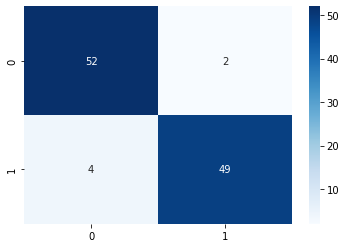

In [ ]:
y_pred = naive_classif.predict(X_test)
y_prob = naive_classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')

# Now lets use logistic regression 

In [ ]:
logistic_clf = LogisticRegression()
param_grids = {'base_estimator__C': [0.0001, 0.01, 1.0, 10.0,100.0, 1000.0],'max_features' : [0.3,0.4,0.5,0.6,0.7],'n_estimators':[25,28,30,32,35],'max_samples' : [0.4,0.5,0.6,0.7,0.8]}
logistic_classif = GridSearchCV(estimator = BaggingClassifier(logistic_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy',verbose = 2)
logistic_classif.fit(X_train,y_train)
logistic_classif.best_estimator_

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=25; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=25; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=25; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=25; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=28; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=28; total time=   0.1s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=28; total time=   0.2s
[CV] END base_estimator__C=0.0001, max_features=0.3, max_samples=0.4, n_estimators=28; t

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.6,
                  max_samples=0.6, n_estimators=28)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.6,
                  max_samples=0.6, n_estimators=28)

In [ ]:
logistic_clf = LogisticRegression()
logistic_classif =BaggingClassifier(logistic_clf,max_features=0.6,max_samples=0.6, n_estimators=28,n_jobs =-1)
logistic_classif.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.6,
                  max_samples=0.6, n_estimators=28, n_jobs=-1)

accuracy score : 0.9813084112149533
f1 score : 0.9807692307692307
auc score : 0.9923130677847659
log loss : 0.16391216258840416
classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        53

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107

*********** confusion matrx ***********


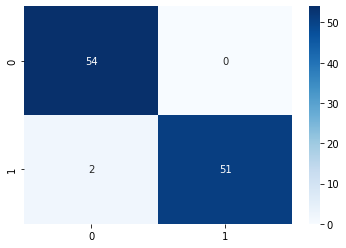

In [ ]:
y_pred = logistic_classif.predict(X_test)
y_prob = logistic_classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')

# Now lets use Support Vector Classifier

In [ ]:
svc_clf = SVC()
param_grids = {'base_estimator__C': [0.0001, 0.01, 1.0, 10.0],'base_estimator__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'max_features' : [0.4,0.5,0.6],'n_estimators':[25,28,30,32,35],'max_samples' : [0.5,0.6,0.7]}
svc_classif = GridSearchCV(estimator = BaggingClassifier(svc_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy',verbose = 2)
svc_classif.fit(X_train,y_train)
svc_classif.best_estimator_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=28; total time=   0.1s
[CV] END base_estimator__C=0.0001, base_estimator__kernel=linear, max_features=0.4, max_samples=0.5, n_estimators=

BaggingClassifier(base_estimator=SVC(), max_features=0.5, max_samples=0.5,
                  n_estimators=32)

BaggingClassifier(base_estimator=SVC(), max_features=0.5, max_samples=0.5,
                  n_estimators=32)

In [ ]:
svc_clf = SVC(C=1.0,random_state = 42)
svc_classif =BaggingClassifier(svc_clf,max_features=0.5,max_samples=0.5, n_estimators=32,n_jobs =-1,random_state = 42)
svc_classif.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(random_state=42), max_features=0.5,
                  max_samples=0.5, n_estimators=32, n_jobs=-1, random_state=42)

accuracy score : 0.9439252336448598
f1 score : 0.9433962264150944
auc score : 0.9820055904961564
log loss : 0.43645044975823755
classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.94      0.94      0.94        53

    accuracy                           0.94       107
   macro avg       0.94      0.94      0.94       107
weighted avg       0.94      0.94      0.94       107

*********** confusion matrx ***********


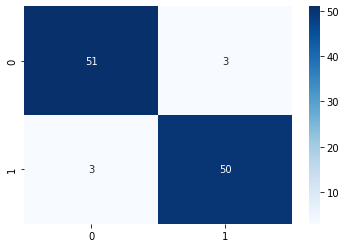

In [ ]:
y_pred = svc_classif.predict(X_test)
y_prob = svc_classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')

# Now lets use Decision Tree

In [ ]:
Dt_clf = DecisionTreeClassifier(max_features = 'auto',random_state = 42)
param_grids = {'base_estimator__criterion': ['gini','entropy'],'base_estimator__max_depth' : [15,20,25,30,35,40],'max_features' : [0.4,0.5,0.6],'n_estimators':[25,28,30,32,35],'max_samples' : [0.5,0.6,0.7]}
Dt_classif = GridSearchCV(estimator = BaggingClassifier(Dt_clf),param_grid = param_grids,cv = 5, scoring = 'accuracy',verbose = 2)
Dt_classif.fit(X_train,y_train)
Dt_classif.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.2s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.2s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=25; total time=   0.1s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=0.4, max_samples=0.5, n_estimators=28; total time=   0.1s
[CV] END base_estimator__criterion=gini, base_estimator__max_depth=15, max_features=

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.4, max_samples=0.7, n_estimators=32)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.4, max_samples=0.7, n_estimators=32)

In [ ]:
Dt_clf = DecisionTreeClassifier(max_depth = 30,max_features = 'auto',random_state = 42) 
Dt_classif =BaggingClassifier(Dt_clf,max_features=0.4,max_samples=0.7, n_estimators=32,n_jobs =-1,random_state = 42)
Dt_classif.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                        max_features='auto',
                                                        random_state=42),
                  max_features=0.4, max_samples=0.7, n_estimators=32, n_jobs=-1,
                  random_state=42)

accuracy score : 0.9532710280373832
f1 score : 0.9523809523809524
auc score : 0.9926624737945492
log loss : 0.15919200278876602
classification report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.96      0.94      0.95        53

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

*********** confusion matrx ***********


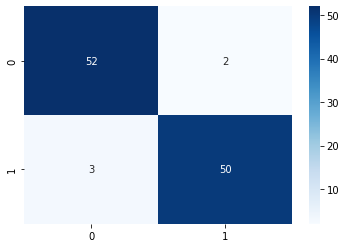

In [ ]:
y_pred = Dt_classif.predict(X_test)
y_prob = Dt_classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')